<a href="https://colab.research.google.com/github/amirFirdaus39/Face-Anonymization/blob/main/faceAnonymization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Detection and Anoymization in Images using MTCNN model**
WIX3001 - Soft Computing - Individual Assignment

Amir Firdaus Bin Abdul Hadi

17204620/2

### **Installing useful libraries**

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, keras
Required-by: 


### **Importing libraries**

In [ ]:
import mtcnn
import matplotlib
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as pyplot
import matplotlib.patches as patches
from mtcnn.mtcnn import MTCNN
from PIL import Image, ImageFilter
import pandas as pd 

# **Model Evaluation using sample images**
The MTCNN model is a pre-trained model. So, there is no need to train and test large dataset for the project. However, we can evaluate the model using small sample of 20 images with labeled keypoints. The keypoints are the coordinates of left and right eyes. If the predicted keypoints from the model is within 30 pixels of labelled keypoints, then it will be detected as successful.

In [ ]:
#20 sample of images data
imgEval = [pyplot.imread('001.jpg'), pyplot.imread('002.jpg'),pyplot.imread('003.jpg'),pyplot.imread('004.jpg'),pyplot.imread('005.jpg'),
           pyplot.imread('006.jpg'),pyplot.imread('007.jpg'),pyplot.imread('008.jpg'),pyplot.imread('009.jpg'),pyplot.imread('010.jpg'),
           pyplot.imread('011.jpg'), pyplot.imread('012.jpg'),pyplot.imread('013.jpg'),pyplot.imread('014.jpg'),pyplot.imread('015.jpg'),
           pyplot.imread('016.jpg'),pyplot.imread('017.jpg'),pyplot.imread('018.jpg'),pyplot.imread('019.jpg'),pyplot.imread('020.jpg')]


In [ ]:
#corresponding eyes keypoints data set with the sample data 
keypoint = pd.read_csv('keypointTest.csv')

In [ ]:
keypoint

left_eye_x  left_eye_y  right_eye_x  right_eye_y
0          280         161          348          160
1          384         270          495          266
2          290         326          429          328
3          307         257          427          255
4          357         265          452          271
5          235         201          311          178
6          391         237          515          233
7          456         385          604          375
8          241         472          409          470
9          180         147          218          143
10         287         160          256          168
11         414         219          507          211
12         183         153          238          153
13         263         271          258          242
14         462         225          569          220
15         193         312          314          307
16         313         181          377          182
17         532         270          690          278
18         154         184          223          184
19         118         169          183          162

### Evaluation algorithm

In [ ]:
success = np.zeros(20)
i = 0
for img in imgEval:
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(img)
  for face in faces:
    kp = face['keypoints']
    left_x = abs(kp['left_eye'][0] - keypoint['left_eye_x'][i]) 
    left_y = abs(kp['left_eye'][1] - keypoint['left_eye_y'][i]) 
    right_x = abs(kp['right_eye'][0] - keypoint['right_eye_x'][i]) 
    right_y = abs(kp['right_eye'][1] - keypoint['right_eye_y'][i]) 
    pixDist = 30
    if left_x < pixDist and left_y < pixDist and right_x < pixDist and right_y < pixDist:
        success[i] = 1
    else:
        success[i] = 0
    i += 1
print(success)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [ ]:
print("Successful Face Detection Rate:", sum(success) / 0.2, "% ")

Successful Face Detection Rate: 90.0 % 


From the sample data of 20 images, the models successfully detect 90% at a time.

---



# **Anonymization** 

## **Extracting face Region of Interest**

Face detector will give the bounding box (x, y)-coordinates of a face in an image.

These coordinates typically represent:

The starting x-coordinate of the face bounding box;
The ending x-coordinate of the face;
The starting y-coordinate of the face location;
The ending y-coordinate of the face;


In [ ]:
# extracting ROI
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = patches.Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

## **Drawing ROI on image**

In [ ]:
def drawROI(filename):
  # load image from file
  pixels = pyplot.imread(filename)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(pixels)
  # display faces on the original image
  draw_image_with_boxes(filename, faces)

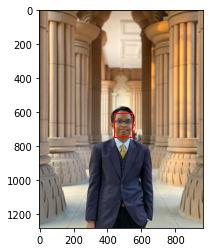

In [ ]:
drawROI('test1.jpg')

## **Blurring image based on extracted ROI**

## **Testing different blur radius level.**


### **Low level blur (Blur radius = 3)**

In [ ]:
# draw an image with detected objects
def blurLow(filename, result_list):
	# load the image
	img = Image.open(filename)
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		crop_img = img.crop((x, y, x+width, y+height))
		blur_img = crop_img.filter(ImageFilter.GaussianBlur(radius = 3))
		img.paste(blur_img, (x, y, x+width, y+height))
		
	display(img)

In [ ]:
def anonymizeLow(filename):
  # load image from file
  pixels = pyplot.imread(filename)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(pixels)

  for face in faces:
    print("Confidence: ", 100*round(face['confidence'], 5), "%")

  # display faces on the original image
  blurLow(filename, faces)

### **High level blur (Blur radius = 30)**

In [ ]:
# draw an image with detected objects
def blurHigh(filename, result_list):
	# load the image
	img = Image.open(filename)
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		crop_img = img.crop((x, y, x+width, y+height))
		blur_img = crop_img.filter(ImageFilter.GaussianBlur(radius = 30))
		img.paste(blur_img, (x, y, x+width, y+height))
		
	display(img)

In [ ]:
def anonymizeHigh(filename):
  # load image from file
  pixels = pyplot.imread(filename)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(pixels)

  for face in faces:
    print("Confidence: ", 100*round(face['confidence'], 5), "%")

  # display faces on the original image
  blurHigh(filename, faces)

# **Testing the model**

Confidence:  99.998 %


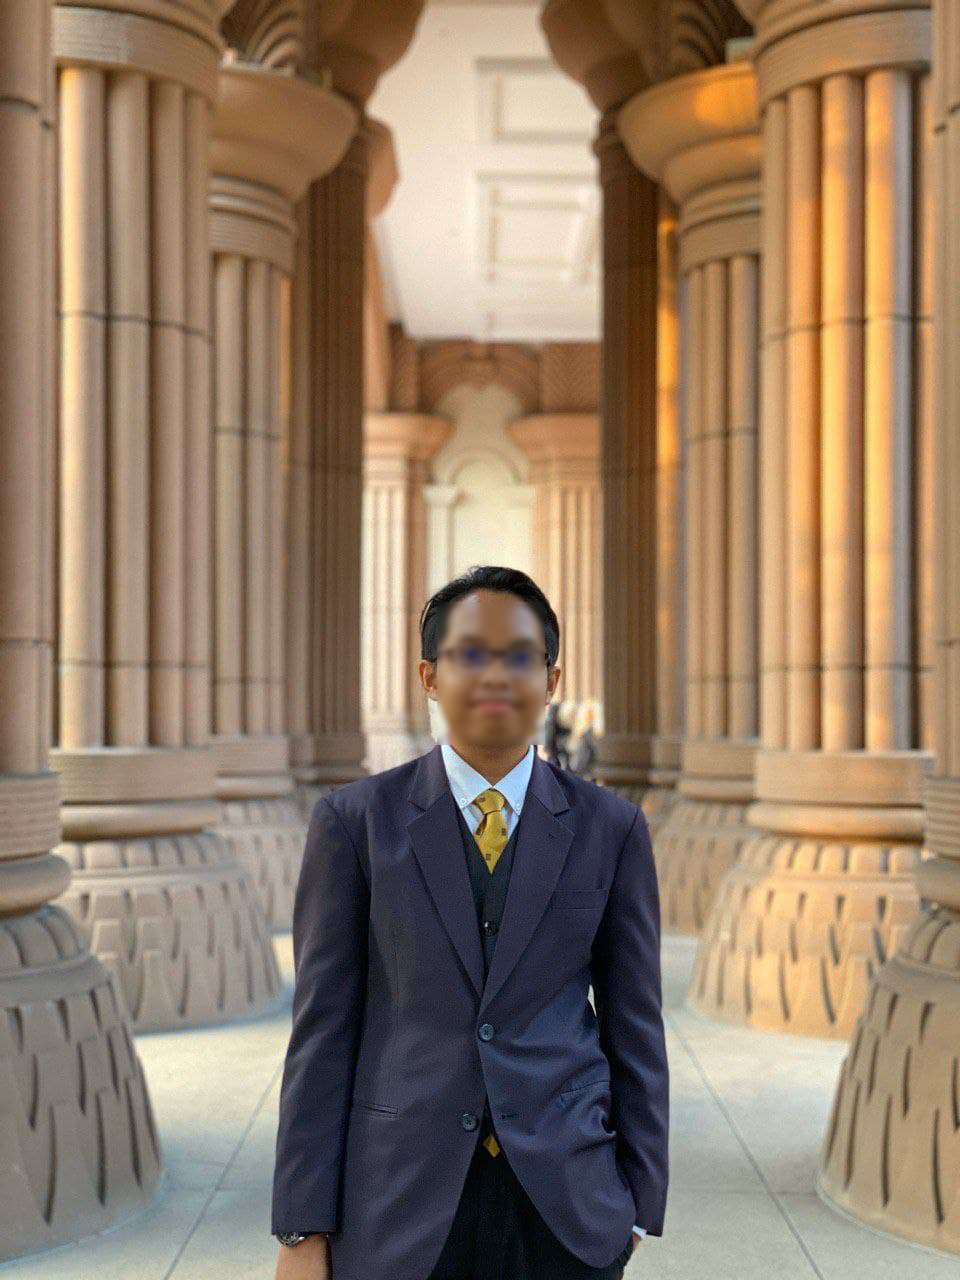

Confidence:  99.998 %


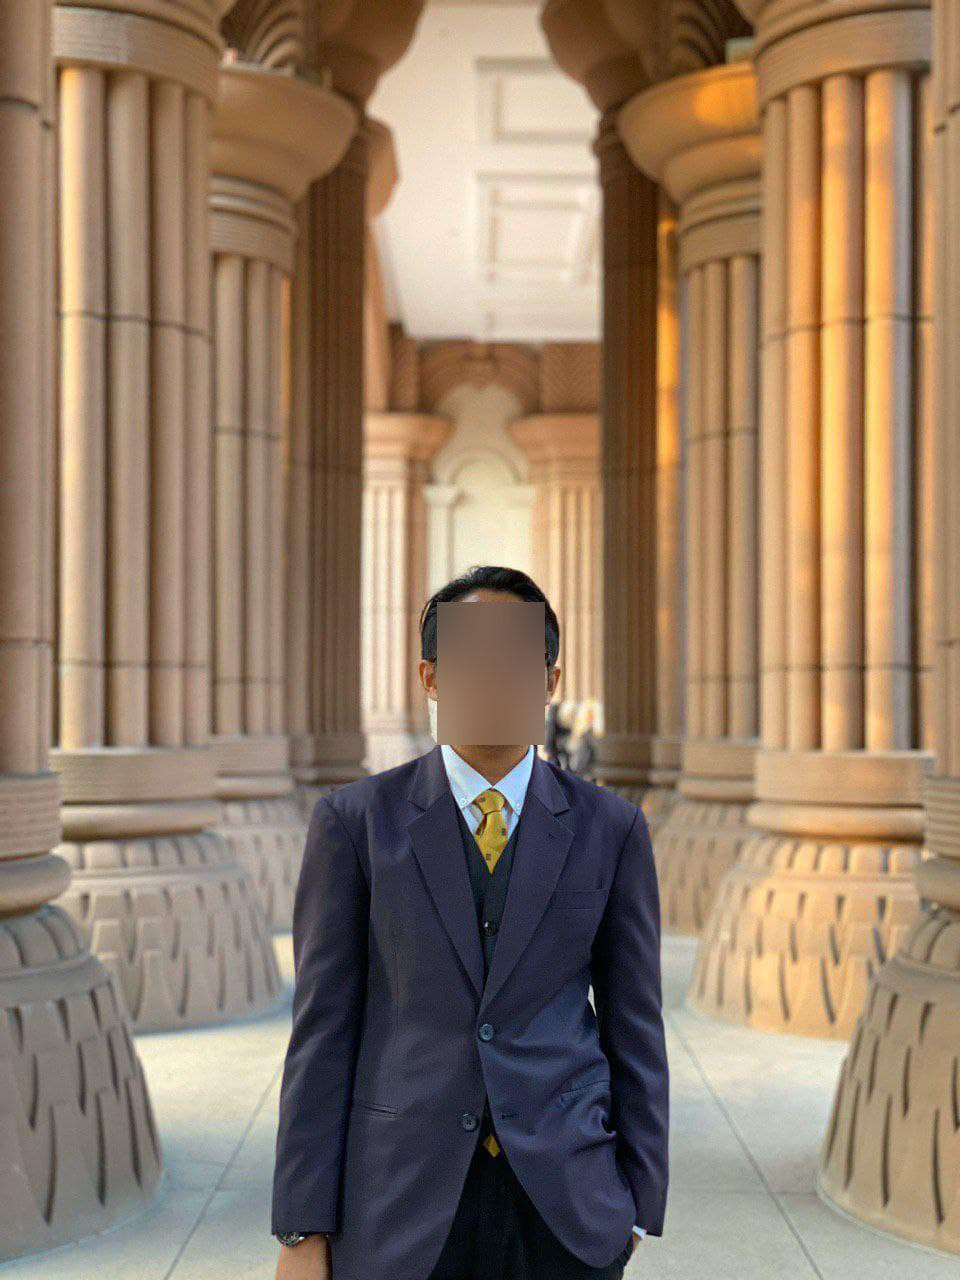

In [ ]:
anonymizeLow('test1.jpg')
anonymizeHigh('test1.jpg')

## **Testing image with multiple faces**

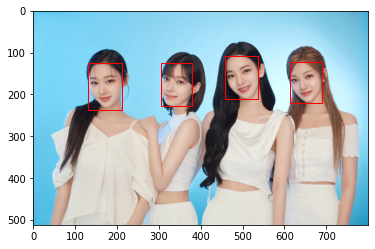

Confidence:  99.99900000000001 %
Confidence:  99.997 %
Confidence:  99.993 %
Confidence:  99.97399999999999 %


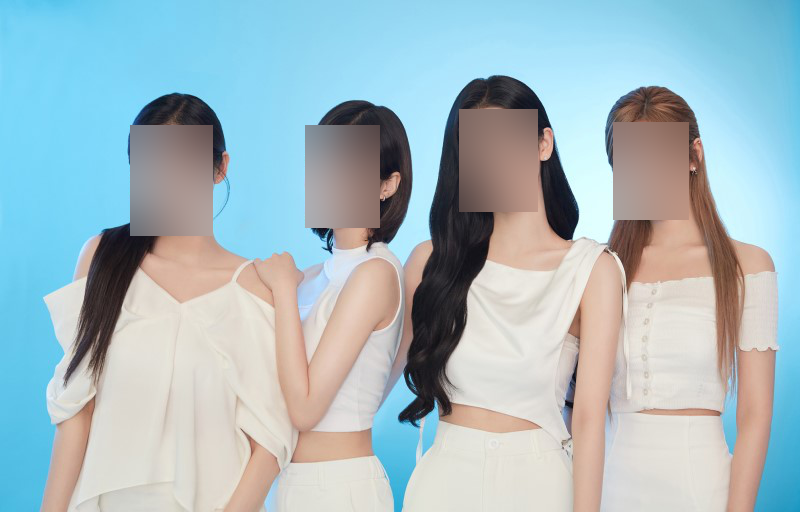

In [ ]:
drawROI('test2.jpg')
anonymizeHigh('test2.jpg')

## **Testing image with angled faces**

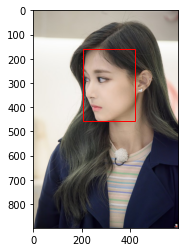

Confidence:  100.0 %


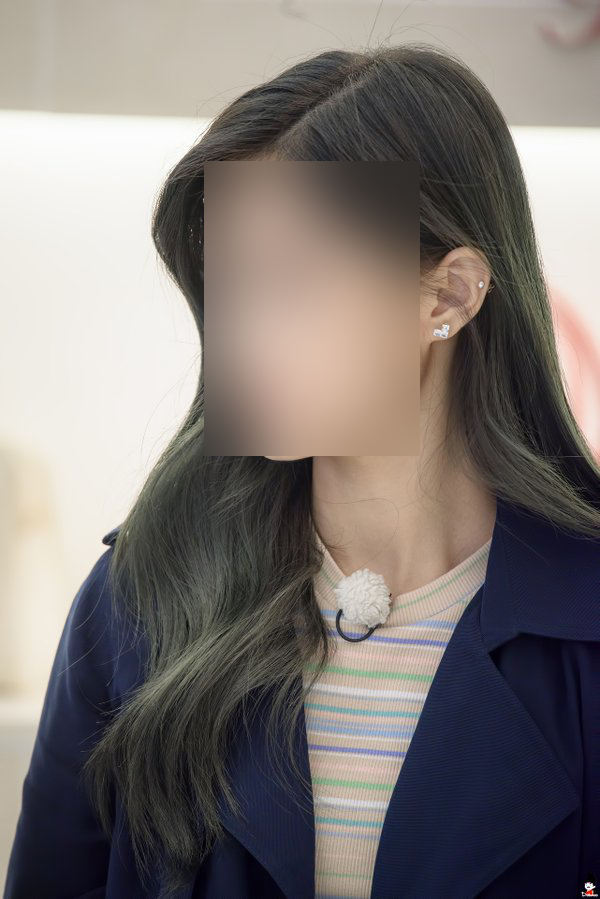

In [ ]:
drawROI('test3.jpg')
anonymizeHigh('test3.jpg')

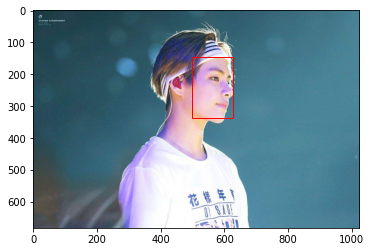

Confidence:  99.984 %


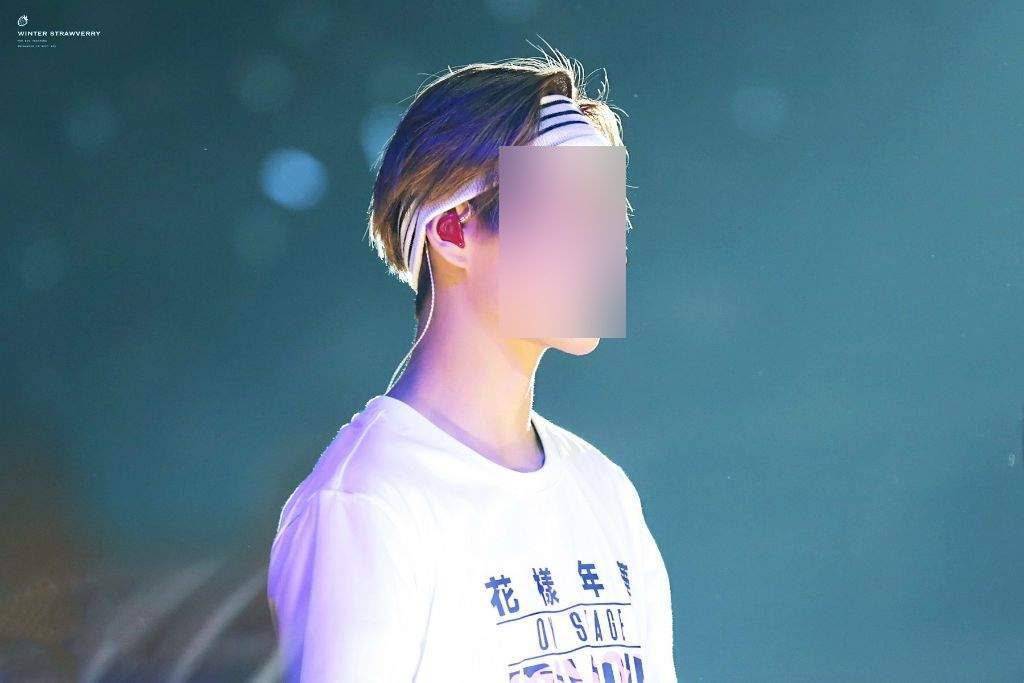

In [ ]:
drawROI('test4.jpg')
anonymizeHigh('test4.jpg')

## **Testing image with frontal face**

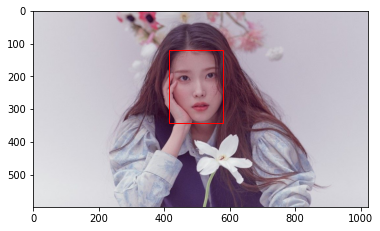

Confidence:  99.80499999999999 %


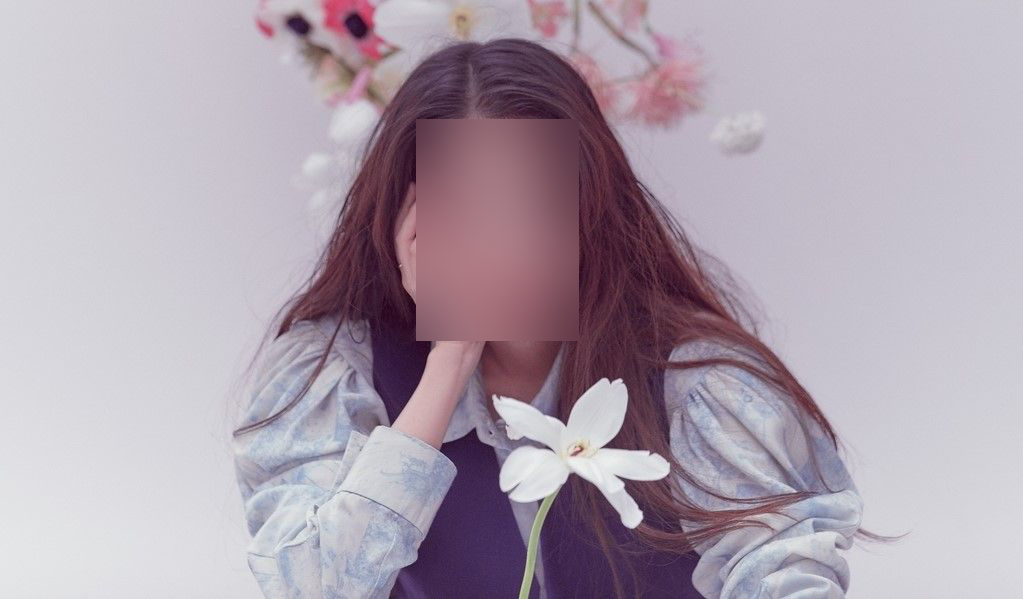

In [ ]:
drawROI('test5.jpg')
anonymizeHigh('test5.jpg')